In [280]:
# importar bibliotecas para leitura dos dados e criação de gráficos

import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [281]:
# Leitura dos dados do seguro
df_seguro = pd.read_csv('./data/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [282]:
# Verificando a quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

In [283]:
#verificando os tipos 
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [284]:
#Verificando as informações contidas
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Estatística Descritiva

Verificar as medidas estatísticas, como tendência central, dispersão, separatrizes, distribuições. Para a predição do target a ser cobrado pelo plano de saúde, é necessário conhecer os dados disponíveis, como distribuição da idade, indíce de massa corporal (bmi), entre outros. 

In [285]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Axes: xlabel='age', ylabel='Count'>

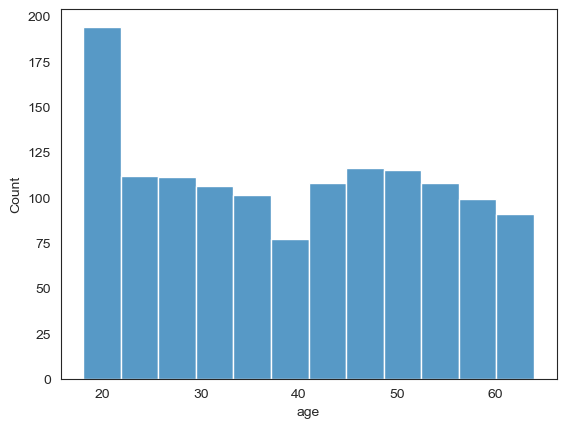

In [286]:
#Distribuição das idades
sns.set_style("white")
plt.tight_layout()

sns.histplot(data=df_seguro,x='age')

<Axes: xlabel='bmi', ylabel='Count'>

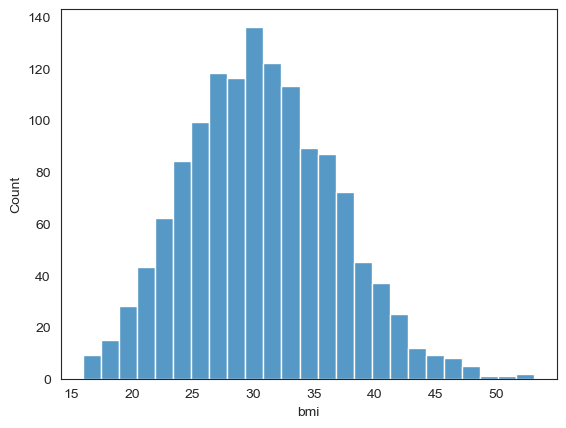

In [287]:
#Distribuição do índice de massa corporal
sns.set_style("white")
plt.tight_layout()

sns.histplot(data=df_seguro,x='bmi')

<Axes: xlabel='children', ylabel='count'>

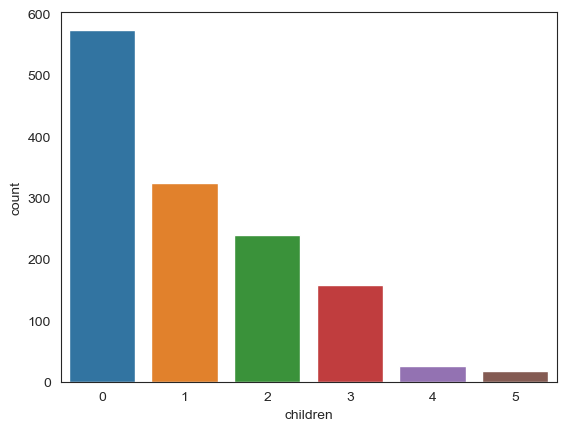

In [288]:
#Quantidade de crianças
sns.set_style("white")
plt.tight_layout()

sns.countplot(data=df_seguro,x='children')

<Axes: xlabel='charges', ylabel='Count'>

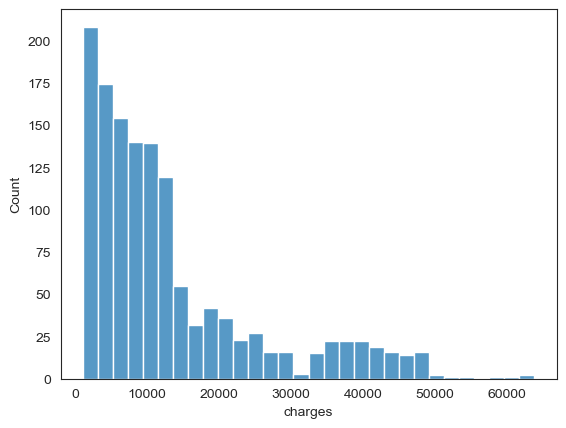

In [289]:
# Verificando a distribuição da variável target "preço do seguro"

sns.histplot(data=df_seguro['charges'])

## Relação entre as features e a variável target

Análise da relação entre as variáveis preditoras com a target. Analisar as dispersões das variáveis preditoras com o valor do seguro. 

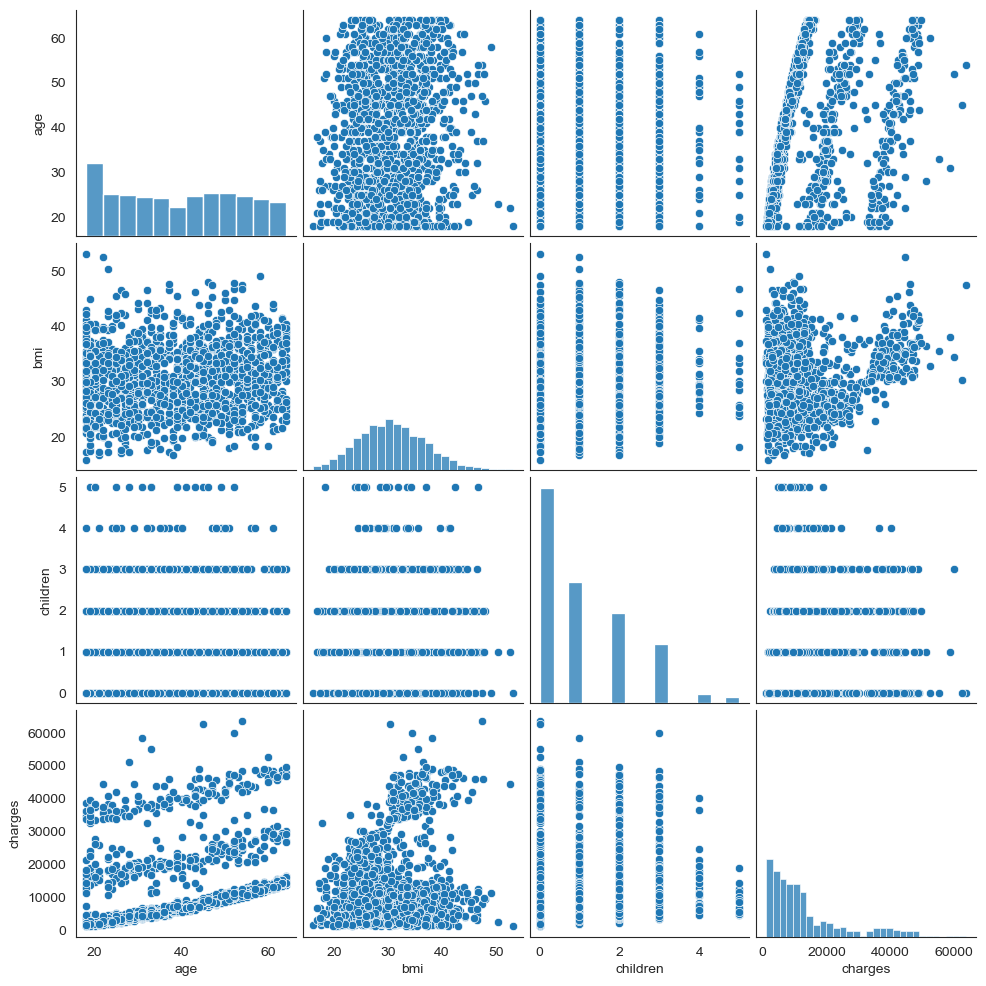

In [290]:
sns.pairplot(data=df_seguro)



Verifica-se a correlação positiva entre idade e o valor cobrado pelo plano de saúde (age x charges). Variável deverá ter uma alta importância no modelo preditivo.

## Codificação de Variáveis Categóricas

Como os modelos de machine learning não conseguem destinguir categorias em sua maioria, iremos codificar as variáveis de sexo, fumante e localização.

In [291]:
# Por termos variáveis nominais, utilizaremos o OneHotEncoder
# pode-se utilizar o get_dummies do pandas ou o OneHotEncoder do scikit Learn
# para variáveis com somente duas classes (sex e smoker), podemos fazer um mapeamento conforme abaixo:

df_seguro['female'] = df_seguro['sex'].map({'female':1,'male':0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes':1,'no':0})

df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [292]:
df_seguro = df_seguro.drop('sex',axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [293]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [294]:
# para as regiões vão utilizar OHE
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [295]:
# concatenar as informaçoes de região com o pandas.concat (axis=1 junta colunas e axis=0 junta linhas)

pd.concat([df_seguro, colunas_regiao], axis=1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [296]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## Determinar as variáveis preditoras e variável target
Utilizaremos a nomenclatura X e y para chamar as variáveis preditoras e target, respectivamente. 

In [297]:
df_seguro.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [298]:
X = df_seguro.drop('charges',axis=1) #exclusão da variável target
y = df_seguro[['charges']] #apenas a variável target

In [299]:
# Variáveis preditoras (também conhecidas como independentes ou features)
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [300]:
# Variável target (também conhecida como dependente ou label)
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## Separação das bases (treino - teste)

Separação das bases para evitar data leakage em um feature scaling. Utilização do scikit learn.

In [301]:
#Importação da função do scikit learn para separação das bases
from sklearn.model_selection import train_test_split

In [302]:
#Tupla com 4 elementos: X de treino e teste, e y de treino e teste
X_treino, X_teste,y_treino, y_teste = train_test_split(X,y,test_size=.2,random_state=42)

In [303]:
#Verificação da quantidade de linhas em treino e teste
X_treino.shape, X_teste.shape,y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

In [304]:
1070+268

1338

## Feature Scaling

Utilização do MinMaxScaler para executar o scaling das features com objetivo de mantê-las em uma mesma escala de grandeza.

In [305]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [306]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scaler
scaler = MinMaxScaler()

In [307]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [308]:
scaler

MinMaxScaler()

In [309]:
colunas = X_treino.columns

# Parte importante!! Fit no treino! Transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

In [310]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [311]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [312]:
X_teste.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
764,0.59,0.25,0.40,0.00,1.00,0.00,0.00,0.00
887,0.39,0.38,0.00,0.00,1.00,1.00,0.00,0.00
890,1.00,0.29,0.00,1.00,1.00,1.00,0.00,0.00
1293,0.61,0.26,0.60,0.00,0.00,1.00,0.00,0.00
259,0.02,0.43,0.00,1.00,0.00,1.00,0.00,0.00


In [313]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


# Análise da correlação entre as variáveis

Avaliar se as variáveis preditoreas apresentam colinearidade. Caso ocorra, efetuar a remoção para que o modelo não seja afetado. 

<Axes: >

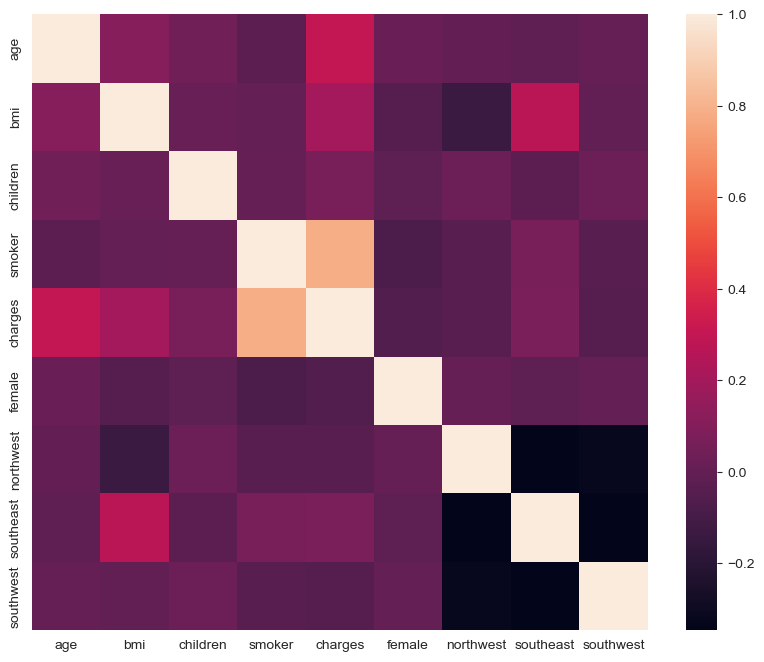

In [314]:
figura, graficos = plt.subplots(figsize=(10,8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),square=True, ax=graficos)

# Verificação de dados fantantes

In [315]:
#Is null busca quem é nulo (dados faltantes)
df_seguro.isnull().sum()


age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

# Machine Learning - Regressão Linear

Utilização da regressão linear com cross validation para evitar overfit e ter uma base de comparação para os demais modelos

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [317]:
# criação do algoritmo (estimador, modelo, preditor, regressor...)
regressao_linear = LinearRegression()

# Treino utilizando Cross Validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear,
                                  X=X_treino,
                                  y=y_treino,
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [318]:
len(valores_rmse_rl)

10

In [319]:
valores_rmse_rl = valores_rmse_rl *-1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [320]:
media_rsme_rl = valores_rmse_rl.mean()
media_rsme_rl

6133.0839262055

# Teste de Árvore de Regressão

In [321]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

#Treino utilizando cross validation
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao,
                                      X=X_treino,
                                      y=y_treino,
                                      cv=10,
                                      scoring='neg_root_mean_squared_error')

valores_rmse_arvore

array([-6026.43210404, -7673.72029932, -6869.445275  , -6716.2475533 ,
       -6790.0761055 , -6376.28098942, -7576.54437827, -7074.609369  ,
       -6666.01622171, -6605.57466144])

In [322]:
valores_rmse_arvore = valores_rmse_arvore *-1

In [323]:
media_rsme_arvore = valores_rmse_arvore.mean()
media_rsme_arvore

6837.49469570031

# Teste de retirada de features que não mostraram influência na variável target

In [324]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [325]:
colunas_regiao = ['northwest','southeast','southwest']

valores_rsme_rl_sem_regiao = cross_val_score(estimator=regressao_linear,
                                             X=X_treino.drop(colunas_regiao, axis=1),
                                             y=y_treino,
                                             cv=10,
                                             scoring='neg_root_mean_squared_error')
valores_rsme_rl_sem_regiao.mean() *-1

6121.545062597131

In [326]:
valores_rsme_rl_sem_regiao = valores_rsme_rl_sem_regiao *-1

In [327]:
colunas_regiao = ['northwest','southeast','southwest']

valores_rsme_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao,
                                             X=X_treino.drop(colunas_regiao, axis=1),
                                             y=y_treino,
                                             cv=10,
                                             scoring='neg_root_mean_squared_error')
valores_rsme_arvore_sem_regiao.mean() *-1

6991.860456547882

In [328]:
colunas_regiao_female = ['northwest','southeast','southwest','female']

valores_rsme_rl_sem_regiao_female = cross_val_score(estimator=regressao_linear,
                                             X=X_treino.drop(colunas_regiao_female, axis=1),
                                             y=y_treino,
                                             cv=10,
                                             scoring='neg_root_mean_squared_error')
valores_rsme_rl_sem_regiao_female.mean() *-1

6114.850969275503

In [329]:
valores_rsme_rl_sem_regiao_female = valores_rsme_rl_sem_regiao_female *-1

Text(0.5, 1.0, 'Comparação de RMSE')

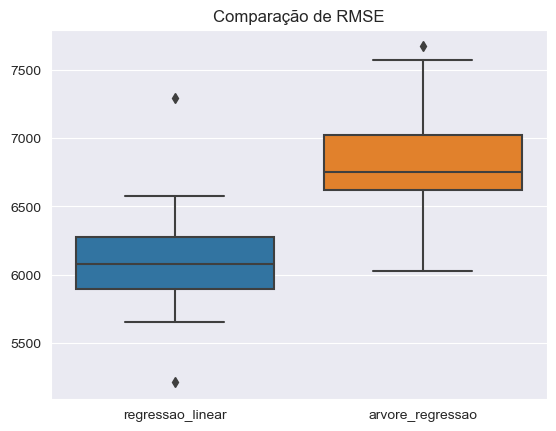

In [330]:
rmse = pd.DataFrame({'regressao_linear': valores_rsme_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.set_style("darkgrid")
sns.boxplot(data=rmse).set_title("Comparação de RMSE")

# Após cross validation seguiremos com o modelo campeão (regressão linear)

In [331]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [332]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [333]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [334]:
#Cálculo do p-valor dos coeficientes de cada regressão
import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Verifica-se que os coeficientes para sexo e crianças não são estatisticamente válidos. Ao passo que idade, índice de massa corporal e fumante, devem ser considerados para o valor do seguro.

# Inferências na base de Teste

Após a seleção do modelo campeão, são feitas inferências dos valores do plano de saúde na base de teste. Somente nesta etapa que a base de testes é utilizada. 

In [335]:
#verificando estimadores scikit learn
# estimador treina com fit e prediz com predict
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [336]:
len(precos_preditos)

268

In [337]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [338]:
predicoes_vs_real = pd.DataFrame({'predicao':precos_preditos.flatten(), 'real':y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs']= abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [339]:
# Teste do r quadrado para comparar com a utilização da média
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095

Mesmo com poucas variáveis (features) o modelo explica de forma aceitável a variavél target.

# Teste de predição passando inputs:

In [340]:
X_teste.drop(colunas_regiao, axis=1).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [341]:
idade = input()

20


In [342]:
indice_massa_corporal = input()

35


In [343]:
criancas = input()

1


In [350]:
fumante = input("1 para fumante, 0 para não fumante: ")

1 para fumante, 0 para não fumante: 0


In [345]:
sexo = input("1 para mulher, 0 para homem: ")

1 para mulher, 0 para homem: 0


In [351]:
idade, indice_massa_corporal, criancas, fumante, sexo

('20', '35', '1', '0', '0')

In [352]:
# Completamos com 1,1,1 porque o X_treino original tinha colunas de região
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lááááá do treino (nada de fitar de novo)
features = scaler.transform(features)
features

G:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04347826, 0.51224105, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [353]:
#pegando as 5 features analisadas
features = features[:,:-3]
features

array([[0.04347826, 0.51224105, 0.2       , 0.        , 0.        ]])

In [354]:
#Resultado da predição
regressao_linear.predict(features)

G:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4910.90361055]])